In [ ]:
#Sheet for data analysis on data extracted from 2018 till 2020 June 30
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
df_2018 = pd.read_excel("/content/drive/My Drive/Project Taxi Analysis (COVID)/Taxi_COunt_2018.xlsx")
df_2018

,type,geometry.type,geometry.coordinates,properties.timestamp,properties.taxi_count,properties.api_info.status
0,Feature,MultiPoint,"[[103.6313, 1.301011], [103.63304, 1.32483], [...",2017-12-31T23:59:44+08:00,3305,healthy
1,Feature,MultiPoint,"[[103.62454, 1.28777], [103.6274, 1.28541], [1...",2018-01-01T00:59:47+08:00,2387,healthy
2,Feature,MultiPoint,"[[103.62993, 1.30274], [103.63256, 1.32408], [...",2018-01-01T01:59:50+08:00,2913,healthy
3,Feature,MultiPoint,"[[103.62075, 1.27163], [103.62953, 1.30139], [...",2018-01-01T02:59:53+08:00,2909,healthy
4,Feature,MultiPoint,"[[103.6148, 1.26167], [103.62303, 1.28373], [1...",2018-01-01T03:59:56+08:00,3045,healthy
...,...,...,...,...,...,...
8643,Feature,MultiPoint,"[[103.62834, 1.29423], [103.63027, 1.30813], [...",2018-12-31T19:59:33+08:00,4826,healthy
8644,Feature,MultiPoint,"[[103.62152, 1.27762], [103.62244, 1.28214], [...",2018-12-31T20:59:36+08:00,5273,healthy
8645,Feature,MultiPoint,"[[103.62531, 1.28928], [103.6259, 1.29145], [1...",2018-12-31T21:59:39+08:00,5157,healthy
8646,Feature,MultiPoint,"[[103.63233, 1.29712], [103.63631, 1.2839], [1...",2018-12-31T22:59:11+08:00,4980,healthy


In [ ]:
df_2019 = pd.read_excel("/content/drive/My Drive/Project Taxi Analysis (COVID)/Taxi_COunt_2019.xlsx")
df_2019

,type,geometry.type,geometry.coordinates,properties.timestamp,properties.taxi_count,properties.api_info.status
0,Feature,MultiPoint,"[[103.6267, 1.307992], [103.63226, 1.30884], [...",2018-12-31T23:59:44+08:00,5887,healthy
1,Feature,MultiPoint,"[[103.62939, 1.32079], [103.6376, 1.30027], [1...",2019-01-01T00:59:47+08:00,3197,healthy
2,Feature,MultiPoint,"[[103.6168, 1.27282], [103.63562, 1.32745], [1...",2019-01-01T01:59:50+08:00,3822,healthy
3,Feature,MultiPoint,"[[103.62167, 1.2948], [103.62203, 1.29633], [1...",2019-01-01T02:59:52+08:00,4195,healthy
4,Feature,MultiPoint,"[[103.62458, 1.2876], [103.626, 1.280204], [10...",2019-01-01T03:59:55+08:00,4002,healthy
...,...,...,...,...,...,...
7771,Feature,MultiPoint,[],2019-11-15T22:01:28+08:00,0,healthy
7772,Feature,MultiPoint,[],2019-11-15T22:01:28+08:00,0,healthy
7773,Feature,MultiPoint,[],2019-11-15T22:01:28+08:00,0,healthy
7774,Feature,MultiPoint,[],2019-11-15T22:01:28+08:00,0,healthy


In [ ]:
df_2020 = pd.read_excel("/content/drive/My Drive/Project Taxi Analysis (COVID)/Taxi_COunt_2020_tillJune.xlsx")
df_2020

,type,geometry.type,geometry.coordinates,properties.timestamp,properties.taxi_count,properties.api_info.status
0,Feature,MultiPoint,"[[103.62431, 1.30243], [103.6409, 1.31675], [1...",2019-12-31T23:59:15+08:00,5093,healthy
1,Feature,MultiPoint,"[[103.62769, 1.31303], [103.63637, 1.3384], [1...",2020-01-01T00:59:47+08:00,2224,healthy
2,Feature,MultiPoint,"[[103.61428, 1.25617], [103.62692, 1.30262], [...",2020-01-01T01:59:50+08:00,2753,healthy
3,Feature,MultiPoint,"[[103.61428, 1.26121], [103.62143, 1.27665], [...",2020-01-01T02:59:53+08:00,3153,healthy
4,Feature,MultiPoint,"[[103.626, 1.280549], [103.62603, 1.28019], [1...",2020-01-01T03:59:56+08:00,3078,healthy
...,...,...,...,...,...,...
4340,Feature,MultiPoint,"[[103.61726, 1.2701], [103.62321, 1.28443], [1...",2020-06-29T19:59:02+08:00,4790,healthy
4341,Feature,MultiPoint,"[[103.6234, 1.27492], [103.62651, 1.29514], [1...",2020-06-29T20:59:35+08:00,4716,healthy
4342,Feature,MultiPoint,"[[103.62358, 1.28648], [103.62599, 1.28966], [...",2020-06-29T21:59:38+08:00,4301,healthy
4343,Feature,MultiPoint,"[[103.62935, 1.3019], [103.63114, 1.30759], [1...",2020-06-29T22:59:41+08:00,3600,healthy


In [ ]:
# Select specific columns and create a clean file 
df_merged=pd.DataFrame(columns=[ 'properties.timestamp','properties.taxi_count'])
df_merged=df_merged.append(df_2018[["properties.timestamp","properties.taxi_count"]])
df_merged=df_merged.append(df_2019[["properties.timestamp","properties.taxi_count"]])
df_merged=df_merged.append(df_2020[["properties.timestamp","properties.taxi_count"]])
#Outputting the df to excel for merged data
df_merged.to_excel(r'Cleaned_Taxi_File.xlsx', index = False)
from google.colab import files
files.download('Cleaned_Taxi_File.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#read the cleaned file
df = pd.read_excel("/content/drive/My Drive/Project Taxi Analysis (COVID)/Cleaned_Taxi_File.xlsx")
df

,properties.timestamp,properties.taxi_count
0,2017-12-31T23:59:44+08:00,3305
1,2018-01-01T00:59:47+08:00,2387
2,2018-01-01T01:59:50+08:00,2913
3,2018-01-01T02:59:53+08:00,2909
4,2018-01-01T03:59:56+08:00,3045
...,...,...
20382,2020-06-29T19:59:02+08:00,4790
20383,2020-06-29T20:59:35+08:00,4716
20384,2020-06-29T21:59:38+08:00,4301
20385,2020-06-29T22:59:41+08:00,3600


In [ ]:
df.dtypes

properties.timestamp     object
properties.taxi_count     int64
dtype: object

In [ ]:
#convert timestamp as datetime field
df['properties.timestamp']= pd.to_datetime(df['properties.timestamp']) 

In [ ]:
df.dtypes

properties.timestamp     datetime64[ns, pytz.FixedOffset(480)]
properties.taxi_count                                    int64
dtype: object

In [ ]:
#add 1 minute
df['properties.timestamp'] =df['properties.timestamp'] + pd.to_timedelta(1, unit='m')

In [ ]:
print(df)

           properties.timestamp  properties.taxi_count
0     2018-01-01 00:00:44+08:00                   3305
1     2018-01-01 01:00:47+08:00                   2387
2     2018-01-01 02:00:50+08:00                   2913
3     2018-01-01 03:00:53+08:00                   2909
4     2018-01-01 04:00:56+08:00                   3045
...                         ...                    ...
20382 2020-06-29 20:00:02+08:00                   4790
20383 2020-06-29 21:00:35+08:00                   4716
20384 2020-06-29 22:00:38+08:00                   4301
20385 2020-06-29 23:00:41+08:00                   3600
20386 2020-06-30 00:00:14+08:00                   3438

[20387 rows x 2 columns]


In [ ]:
# add new feature day of_week
df['day_of_week']=df['properties.timestamp'].dt.dayofweek

In [ ]:
# add new feature month
df['month']=df['properties.timestamp'].dt.month

In [ ]:
# add new feature year
df['year']=df['properties.timestamp'].dt.year

In [ ]:
# add new feature day of month
df['day_of_month'] =df['properties.timestamp'].dt.day

In [ ]:
# add new feature weekday/weekend
df.loc[df['day_of_week'] >=5, 'weekday_weekend'] = 'weekend' 
df.loc[df['day_of_week'] < 5, 'weekday_weekend'] = 'weekday' 

In [ ]:
print(df.columns)

Index(['properties.timestamp', 'properties.taxi_count', 'day_of_week', 'month',
       'year', 'day_of_month', 'weekday_weekend'],
      dtype='object')


In [ ]:
#set index
df = df.set_index('properties.timestamp')

In [ ]:
df

,properties.taxi_count,day_of_week,month,year,day_of_month,weekday_weekend
properties.timestamp,,,,,,
2018-01-01 00:00:44+08:00,3305,0,1,2018,1,weekday
2018-01-01 01:00:47+08:00,2387,0,1,2018,1,weekday
2018-01-01 02:00:50+08:00,2913,0,1,2018,1,weekday
2018-01-01 03:00:53+08:00,2909,0,1,2018,1,weekday
2018-01-01 04:00:56+08:00,3045,0,1,2018,1,weekday
...,...,...,...,...,...,...
2020-06-29 20:00:02+08:00,4790,0,6,2020,29,weekday
2020-06-29 21:00:35+08:00,4716,0,6,2020,29,weekday
2020-06-29 22:00:38+08:00,4301,0,6,2020,29,weekday


In [ ]:
# import package for EDA
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(array([736694.66666667, 736784.66666667, 736875.66666667, 736967.66666667,
        737059.66666667, 737149.66666667, 737240.66666667, 737332.66666667,
        737424.66666667, 737515.66666667, 737606.66666667]),
 <a list of 11 Text major ticklabel objects>)

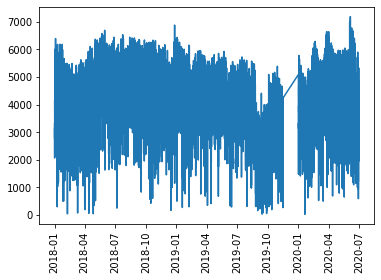

In [ ]:
sns.lineplot(data = df['properties.taxi_count'])
plt.xticks(rotation = 90)

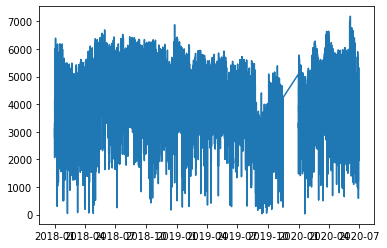

In [ ]:
plt.plot(df['properties.taxi_count'])

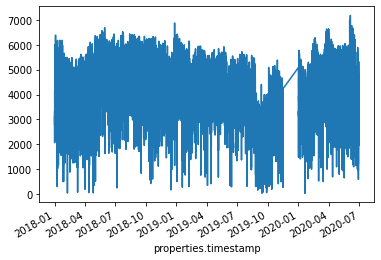

In [ ]:
df['properties.taxi_count'].plot()

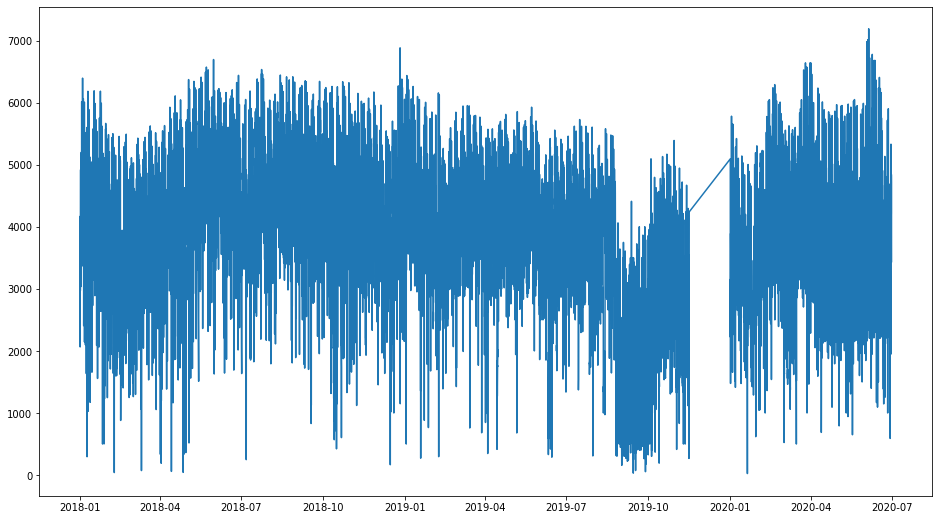

In [ ]:
plt.figure(figsize = (16, 9))
sns.lineplot(data = df['properties.taxi_count'])

In [ ]:
#resampling by day
df.resample('D').median()

,properties.taxi_count,day_of_week,month,year,day_of_month
properties.timestamp,,,,,
2018-01-01 00:00:00+08:00,3304.5,0.0,1.0,2018.0,1.0
2018-01-02 00:00:00+08:00,4501.5,1.0,1.0,2018.0,2.0
2018-01-03 00:00:00+08:00,4950.5,2.0,1.0,2018.0,3.0
2018-01-04 00:00:00+08:00,4721.5,3.0,1.0,2018.0,4.0
2018-01-05 00:00:00+08:00,3907.0,4.0,1.0,2018.0,5.0
...,...,...,...,...,...
2020-06-26 00:00:00+08:00,3661.0,4.0,6.0,2020.0,26.0
2020-06-27 00:00:00+08:00,3368.5,5.0,6.0,2020.0,27.0
2020-06-28 00:00:00+08:00,2754.0,6.0,6.0,2020.0,28.0


In [ ]:
df_hour=df.groupby(df.index.hour).mean()

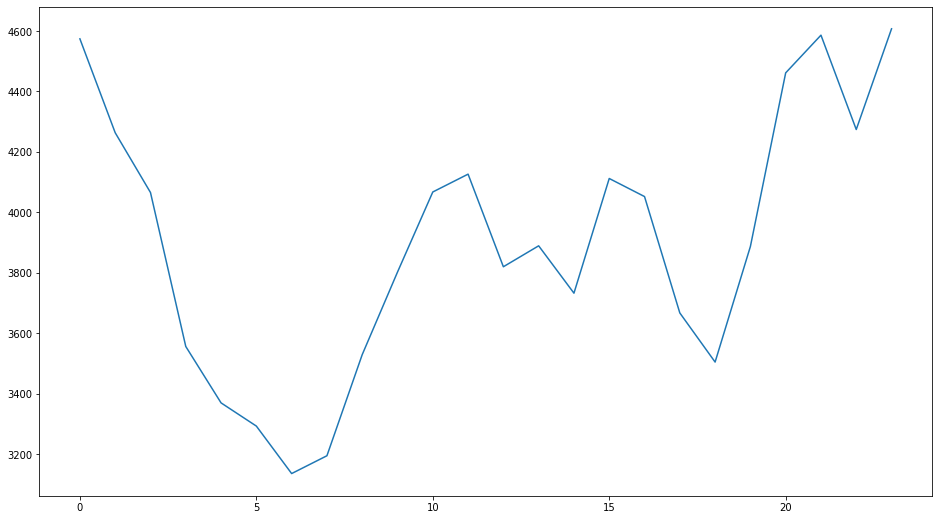

In [ ]:
plt.figure(figsize = (16, 9))
sns.lineplot(data = df_hour['properties.taxi_count'])

In [ ]:
 #resample monthly
 df_month=df.groupby(pd.Grouper(freq='M')).mean()

In [ ]:
df_month

,properties.taxi_count,day_of_week,month,year,day_of_month
properties.timestamp,,,,,
2018-01-31 00:00:00+08:00,3966.690122,2.809202,1.0,2018.0,15.933694
2018-02-28 00:00:00+08:00,3506.289634,3.024390,2.0,2018.0,14.170732
2018-03-31 00:00:00+08:00,3715.709459,3.089189,3.0,2018.0,16.006757
2018-04-30 00:00:00+08:00,3762.919220,3.016713,4.0,2018.0,15.536212
2018-05-31 00:00:00+08:00,4690.679505,2.892710,5.0,2018.0,16.016506
2018-06-30 00:00:00+08:00,4581.146444,3.100418,6.0,2018.0,15.525802
2018-07-31 00:00:00+08:00,4377.114958,2.934903,7.0,2018.0,16.288089
2018-08-31 00:00:00+08:00,4529.553306,2.998650,8.0,2018.0,15.989204
2018-09-30 00:00:00+08:00,4424.235043,3.170940,9.0,2018.0,15.524217


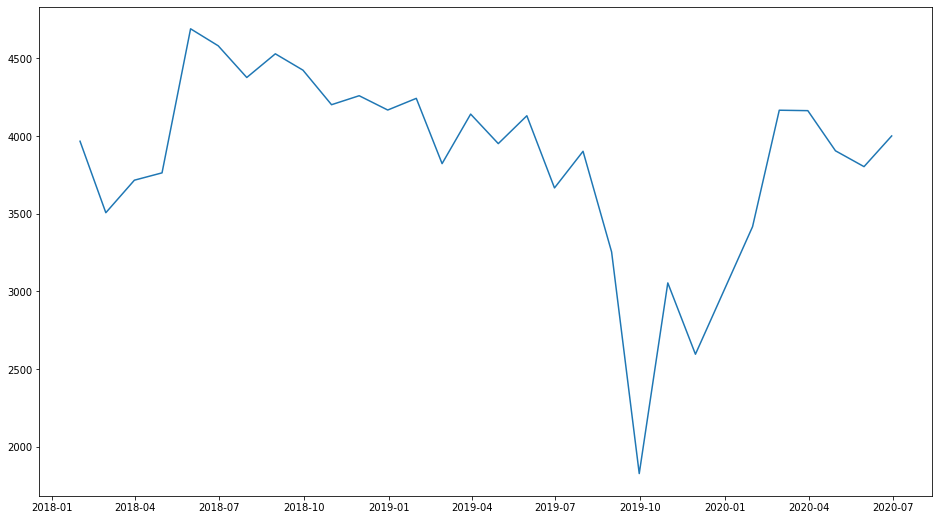

In [ ]:
plt.figure(figsize = (16, 9))
sns.lineplot(data = df_month['properties.taxi_count'])

In [ ]:
 df_month_resample=df.resample('M')["properties.taxi_count"].mean()

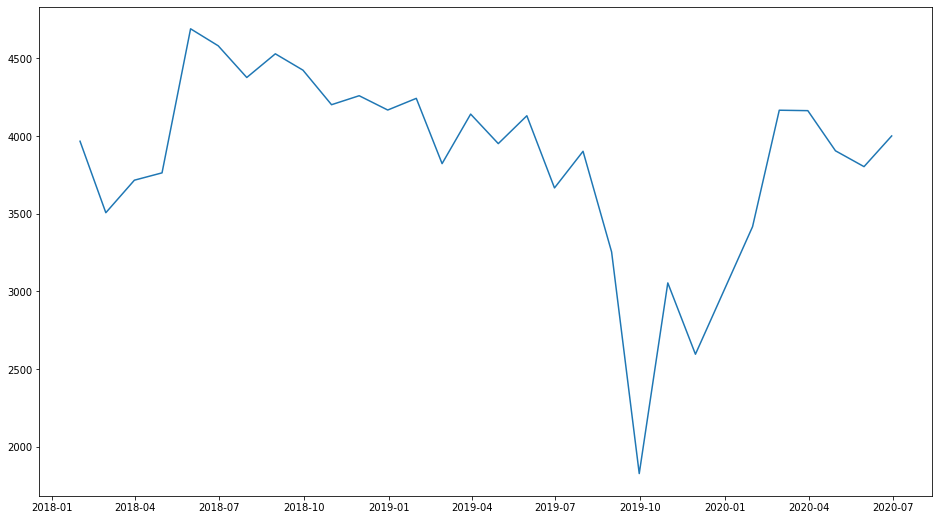

In [ ]:
plt.figure(figsize = (16, 9))
sns.lineplot(data = df_month_resample)

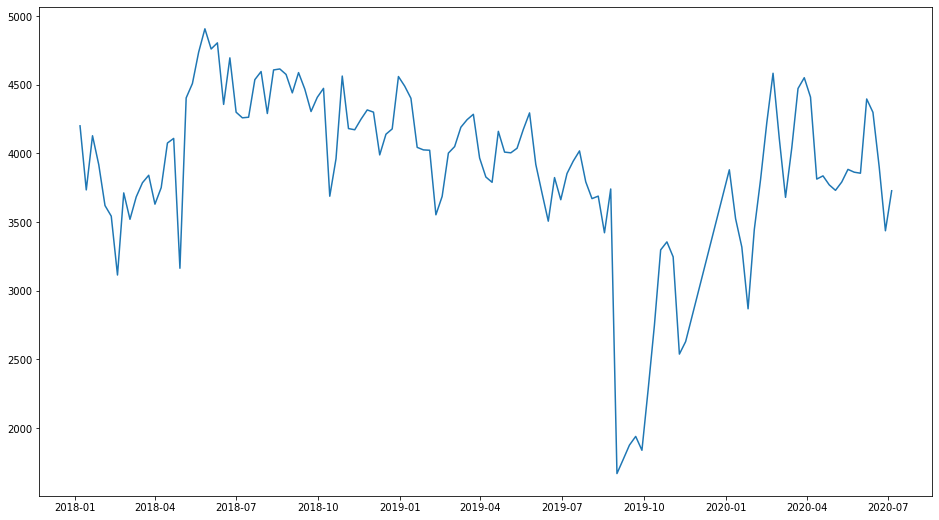

In [ ]:
#resample by week
df_week=df.groupby(pd.Grouper(freq='W')).mean()
plt.figure(figsize = (16, 9))
sns.lineplot(data = df_week['properties.taxi_count'])

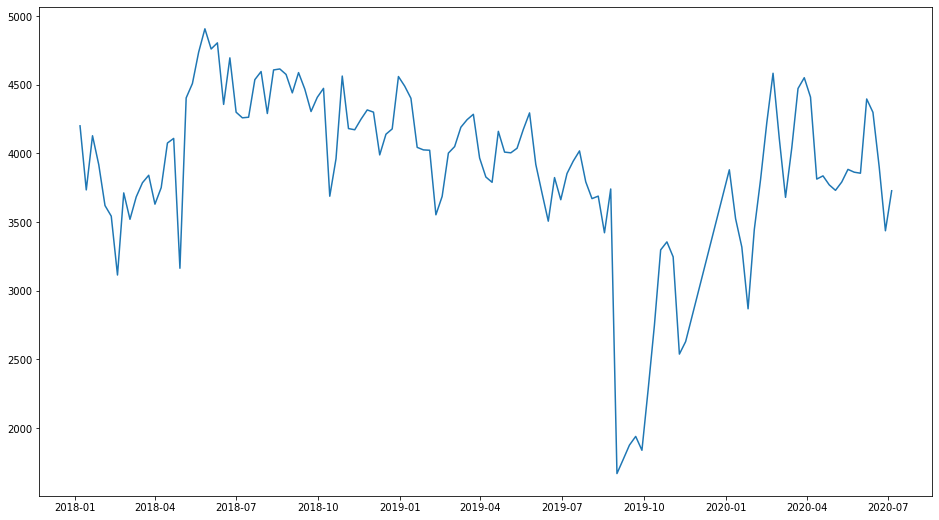

In [ ]:
df_week_resample=df.resample('W')["properties.taxi_count"].mean()
plt.figure(figsize = (16, 9))
sns.lineplot(data = df_week_resample)

In [ ]:
# export DataFrame as csv
df.to_csv(r'Output_Clean_Features_File.csv')

In [ ]:
df

,properties.taxi_count,day_of_week,month,year,day_of_month,weekday_weekend
properties.timestamp,,,,,,
2018-01-01 00:00:44+08:00,3305,0,1,2018,1,weekday
2018-01-01 01:00:47+08:00,2387,0,1,2018,1,weekday
2018-01-01 02:00:50+08:00,2913,0,1,2018,1,weekday
2018-01-01 03:00:53+08:00,2909,0,1,2018,1,weekday
2018-01-01 04:00:56+08:00,3045,0,1,2018,1,weekday
...,...,...,...,...,...,...
2020-06-29 20:00:02+08:00,4790,0,6,2020,29,weekday
2020-06-29 21:00:35+08:00,4716,0,6,2020,29,weekday
2020-06-29 22:00:38+08:00,4301,0,6,2020,29,weekday


In [ ]:
#output the file to local
from google.colab import files
files.download('Output_Clean_Features_File.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>